# Project: Investigate a Dataset - TMDb-Movie-Data-Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
### Dataset Description
In this project, we analyze the "**tmdb-movies.csv**" dataset. This dataset contains information about **10,000** movies collected from The Movie Database (TMDb), including user ratings, revenue, budget, and genre. Our analysis will focus on identifying the factors associated with movie success.
### Question(s) for Analysis
We will focus on the following research questions:
1.  **What factors are associated with movies that have high revenues?** (e.g., budget, popularity, genres, and vote average).
2.  **Is there a relationship between a movie's budget and its success?** (measured by popularity and revenue).

<a id='wrangling'></a>
## Data Wrangling

    - Parse the 'cast' and 'crew' columns (which are JSON-like strings).
    - Extract features: cast size, crew size, female/male counts, directors, etc.

In [3]:
import pandas as pd
import numpy as np

# load the dataset
df = pd.read_csv('tmdb-movies.csv')

In [4]:
# Disply the first few rows to get a sense of the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [61]:
# Display the size of the dataframe and column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Display a statistical summary of the numerical columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning


In [6]:
# Drop rows where budget_adj or revenue_adj are 0
df_cleaned = df.query('budget_adj != 0 and revenue_adj != 0')

In [7]:
# Check the new shape of the dataframe to see how many rows were dropped
df_cleaned.shape

(3855, 21)

In [8]:
# Drop columns that are not needed for our analysis to keep the dataset clean
# Example: imdb_id, homepage, tagline, etc.

df_cleaned.drop([
    'imdb_id', 'homepage', 'tagline', 
    'keywords', 'cast', 'director', 
    'production_companies', 'overview', 
    'budget', 'revenue', 'id'
], axis=1, inplace=True)

C:\Users\Darawsheh\AppData\Local\Temp\ipykernel_30696\3272080650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop([


In [66]:
# Let's check the remaining columns and their info

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3855 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3855 non-null   float64
 1   original_title  3855 non-null   object 
 2   runtime         3855 non-null   int64  
 3   genres          3855 non-null   object 
 4   release_date    3855 non-null   object 
 5   vote_count      3855 non-null   int64  
 6   vote_average    3855 non-null   float64
 7   release_year    3855 non-null   int64  
 8   budget_adj      3855 non-null   float64
 9   revenue_adj     3855 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 331.3+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### 1D Exploratory Data Analysis
This section explores the distribution and properties of individual variables to gain a foundational understanding of the dataset before analyzing relationships between them.
### Distribution of Movie Revenue
o understand the range and distribution of our dependent variable, **revenue_adj**, we'll create a histogram. This plot will show us how many movies fall into different revenue brackets.


<Axes: title={'center': 'Distribution of Movie Revenue (Adjusted)'}, xlabel='Revenue (Adjusted)', ylabel='Number of Movies'>

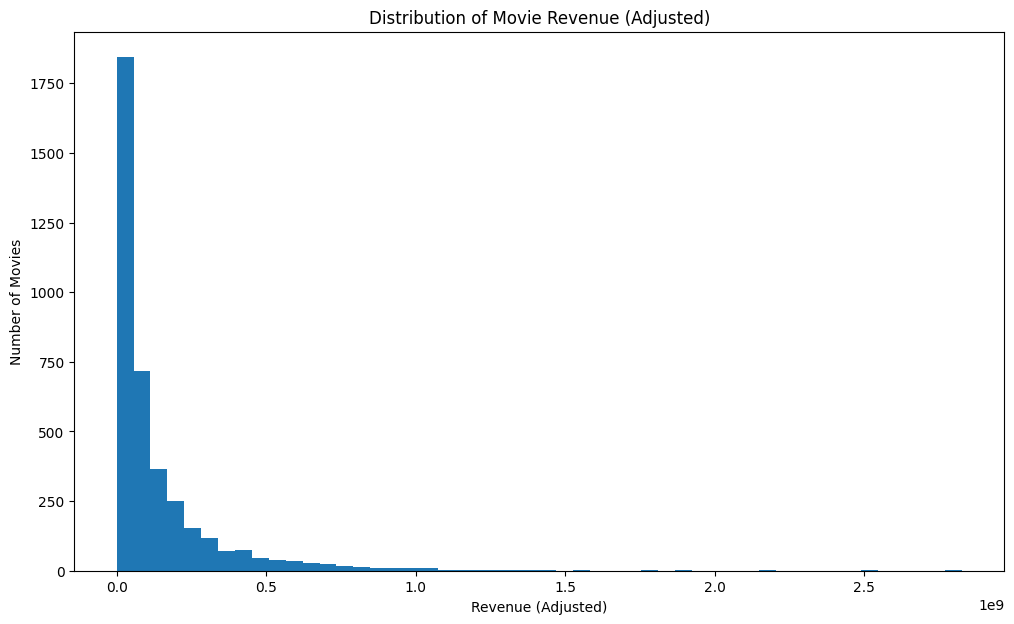

In [21]:
# To explore the distribution of the movie revenues, we will use a histogram.
# This plot shows how many movies fall into different revenue brackets.
df_cleaned['revenue_adj'].plot(
    kind='hist',
    bins=50,
    figsize=(12, 7),
    title='Distribution of Movie Revenue (Adjusted)',
    xlabel='Revenue (Adjusted)',
    ylabel='Number of Movies'
)

## Note: 
The histogram shows that the majority of films have relatively low revenues. A small number of films, often referred to as "blockbusters," earn extremely high revenues. The distribution is highly skewed to the right.

### Movie Count by Genre
Understanding the frequency of each genre is important context for our analysis. We create a bar chart to visualize the number of movies available for each genre in the dataset.

<Axes: title={'center': 'Number of Movies per Genre'}, xlabel='Genre', ylabel='Number of Movies'>

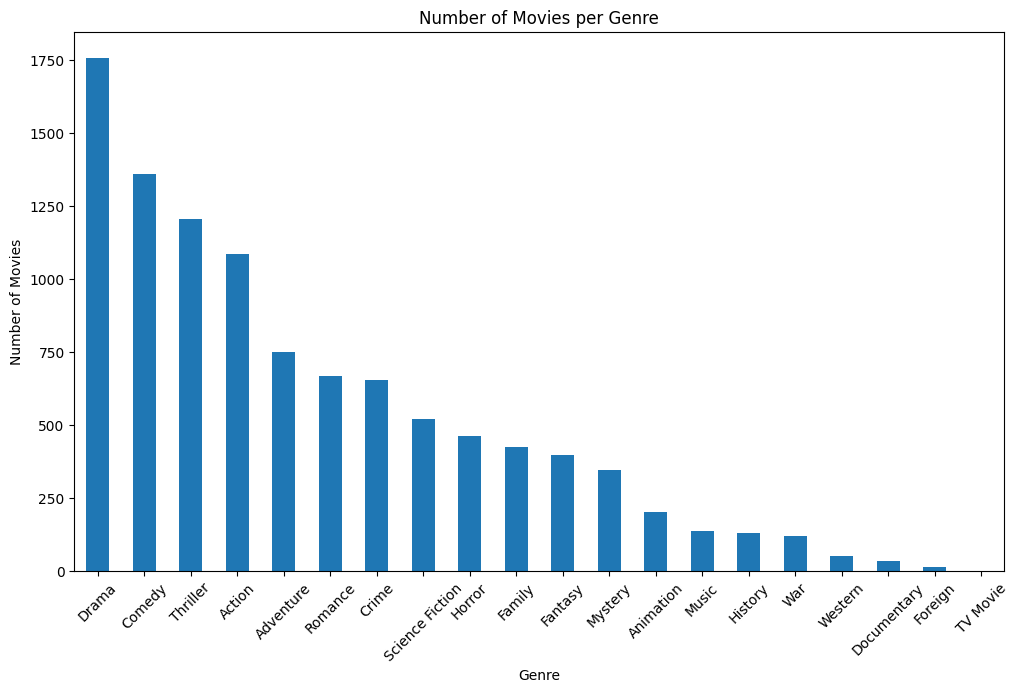

In [10]:
# To explore the count of each movie genre, we first need to prepare the data
# by splitting the multi-valued 'genres' column.
df_genres_exploded = df_cleaned.copy()
df_genres_exploded['genres'] = df_genres_exploded['genres'].apply(lambda x: x.split('|'))
df_genres_exploded = df_genres_exploded.explode('genres')

# Count the number of movies per genre and plot the bar chart.
genre_counts = df_genres_exploded['genres'].value_counts()
genre_counts.plot(
    kind='bar',
    figsize=(12, 7),
    title='Number of Movies per Genre',
    xlabel='Genre',
    ylabel='Number of Movies',
    rot=45
)

## Note: 
The plot shows that Drama and Comedy are the most common genres in our dataset, followed by Thriller and Action. This information is useful when interpreting the average revenue for each genre later on.

In [11]:
# Function to create a scatter plot
def create_scatter_plot(df, x_axis, y_axis, title):
    """
    This function generates a scatter plot to visualize the relationship
    between two variables from a DataFrame.

    Args:
        df (DataFrame): The DataFrame to plot.
        x_axis (str): The name of the column for the x-axis.
        y_axis (str): The name of the column for the y-axis.
        title (str): The title of the plot.
    """
    df.plot(
        kind='scatter',
        x=x_axis,
        y=y_axis,
        figsize=(12, 7),
        title=title,
        xlabel=x_axis.replace('_', ' ').title(),  # Clean up axis label
        ylabel=y_axis.replace('_', ' ').title(),  # Clean up axis label
        alpha=0.5
    )

### Research Question 1: What factors are associated with movies that have high revenues?
We will explore the relationship between our dependent variable, **revenue**, and the independent variables: ***budget**, **popularity**, and **genre**.

We use a scatter plot to visualize the relationship between a movie's budget and the revenue it generated.

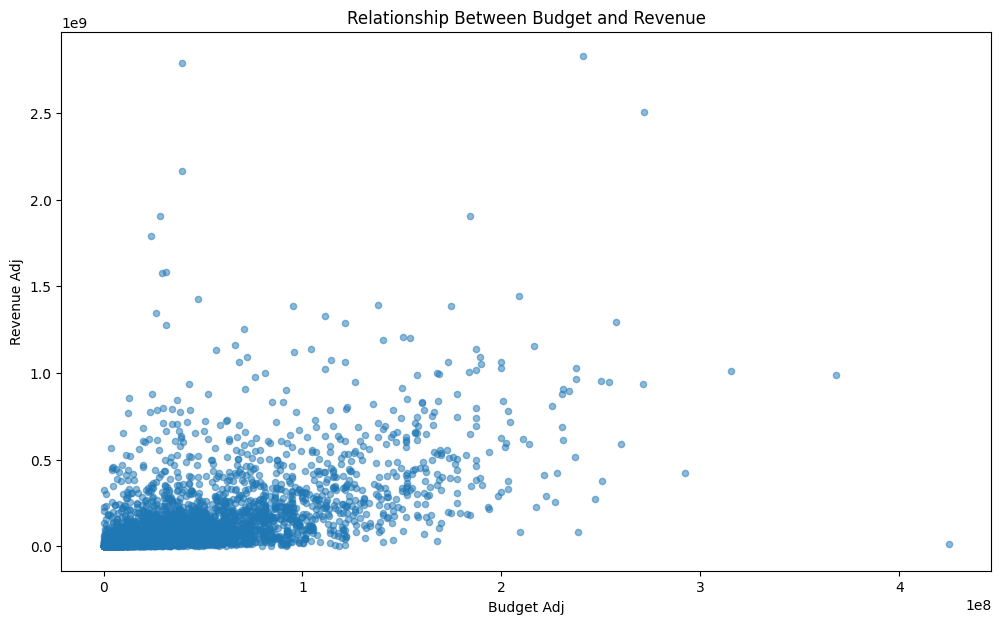

In [16]:
# Relationship between Budget and Revenue

# Use the function to plot the relationship between budget and revenue
create_scatter_plot(df_cleaned, 'budget_adj', 'revenue_adj', 'Relationship Between Budget and Revenue')

## Note: 
There appears to be a positive correlation between a movie's budget and its revenue. Higher-budget films tend to generate higher revenues, as shown by the upward trend in the scatter plot.

We'll use another scatter plot to examine the relationship between a movie's popularity and its revenue.

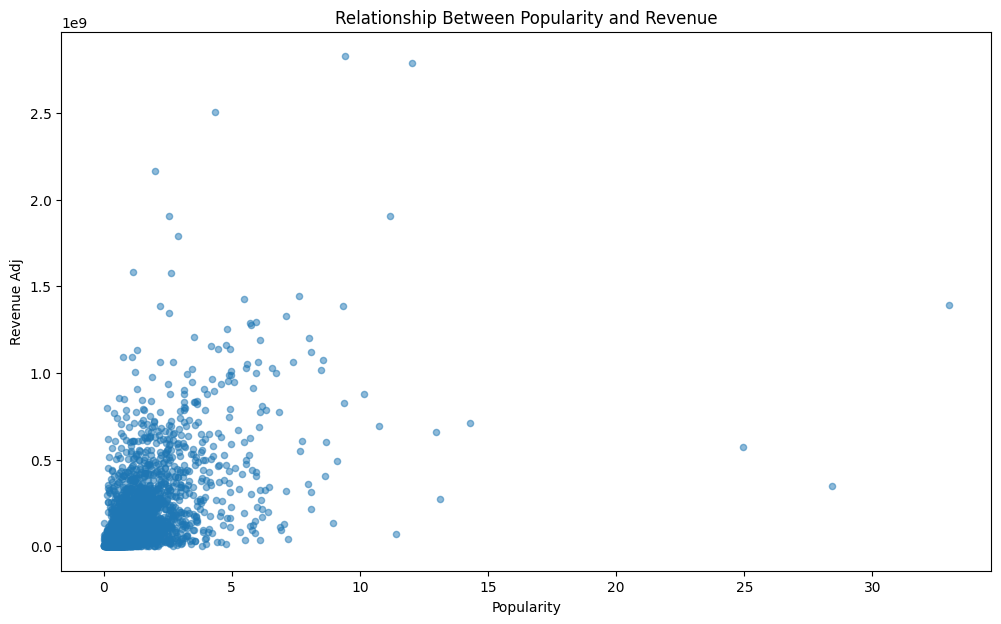

In [17]:
# Relationship between Popularity and Revenue

# Use the function to plot the relationship between popularity and revenue
create_scatter_plot(df_cleaned, 'popularity', 'revenue_adj', 'Relationship Between Popularity and Revenue')

## Note: 
The plot shows a **strong positive correlation** between a movie's popularity and its revenue. This is a logical finding, as more popular films attract larger audiences and thus earn more money.

To analyze the relationship between genre and revenue, we must first split the multi-valued **genres** column. We will then calculate the average revenue for each genre and visualize the results using a bar chart.

<Axes: title={'center': 'Average Revenue by Movie Genre'}, xlabel='Genre', ylabel='Average Revenue'>

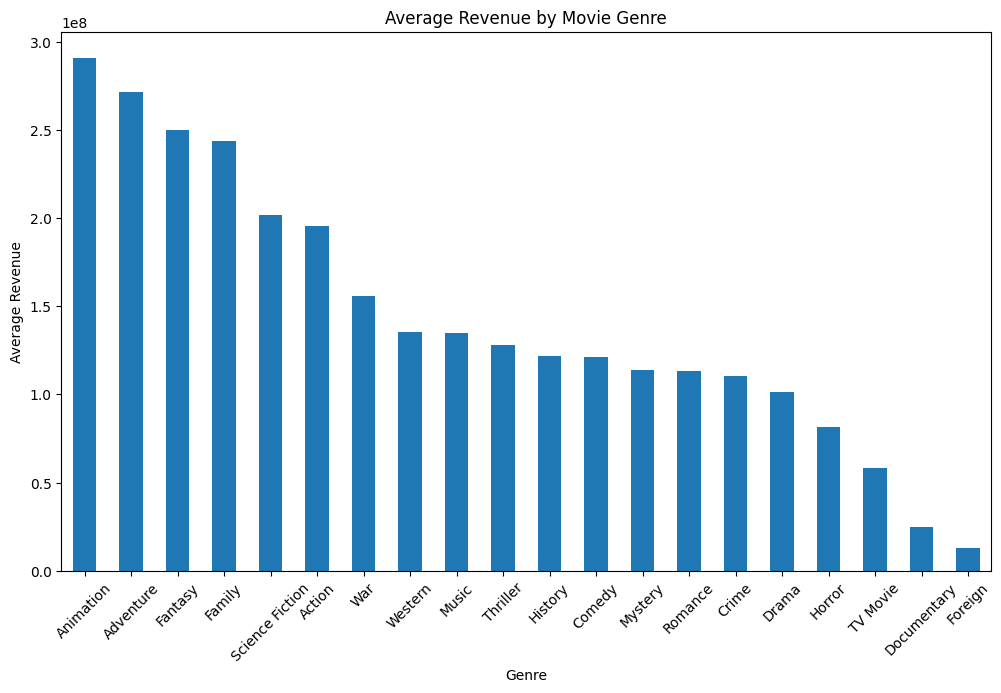

In [69]:
# Split the genres column and stack the values

df_genres = df_cleaned.copy()
df_genres['genres'] = df_genres['genres'].apply(lambda x: x.split('|'))
df_genres = df_genres.explode('genres')

# Group by genre and calculate the average revenue
genre_revenue = df_genres.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False)

# Now, plot the results using pandas plot method
genre_revenue.plot(
    kind='bar',
    figsize=(12, 7),
    title='Average Revenue by Movie Genre',
    xlabel='Genre',
    ylabel='Average Revenue',
    rot=45
)

## Note: 
The bar plot reveals that certain genres, such as **Adventure** and **Science Fiction**, have significantly higher average revenues than others.

### Research Question 2: Is there a relationship between a movie's budget and its success?

To measure success beyond just revenue, we'll examine the relationship between a movie's **budget** and its **vote average**.

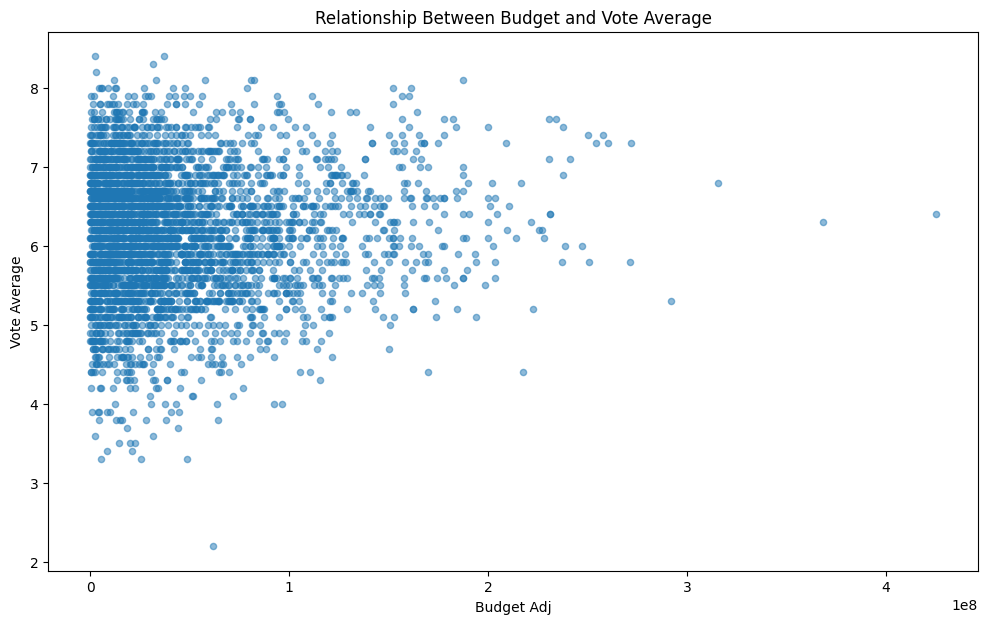

In [18]:
# Use the function to plot the relationship between budget and vote average
create_scatter_plot(df_cleaned, 'budget_adj', 'vote_average', 'Relationship Between Budget and Vote Average')

## Note: 
This plot shows a **weak to no correlation** between a movie's budget and its average vote. This suggests that simply spending more money does not guarantee a higher-rated film. Factors like script quality, directing, and acting likely play a more significant role in how a film is received by the audience.

<a id='conclusions'></a>
## Conclusions

- **Positive Correlation:** There is a clear positive relationship between a movie's budget and its revenue.
  
- **Strong Correlation:** The relationship between a movie's popularity and its revenue is also strong and positive.
 
- **Genre Matters:** The genre of a movie has a significant impact on its average revenue, with genres like Adventure and Science Fiction leading the pack.
  
- **Weak Correlation:** There is a very weak, if any, correlation between a movie's budget and its vote average. Spending more money does not guarantee a higher quality film in the eyes of the public.

## Limitations
The analysis is limited by the quality of the raw data. Many films had a recorded budget or revenue of zero, which we treated as missing data and removed. This might have excluded a large number of films from our analysis, potentially introducing a bias. Additionally, this analysis only shows correlation, not causation. For example, a high budget might not directly cause a high revenue; rather, both could be a result of the studio's confidence in a film's star-studded cast or director.

In [22]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html TMDb-Movie-Data-Analysis.ipynb

[NbConvertApp] Converting notebook TMDb-Movie-Data-Analysis.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 751823 bytes to TMDb-Movie-Data-Analysis.html
